#Harvard AI Bootcamp - Handwriting Classification with Convolutional Neural Networks

## Make a copy of this notebook! Editing directly will not be saved.

##Introduction

Welcome to this interactive project on Handwriting Classification using Convolutional Neural Networks (CNNs). In this tutorial, we'll explore the powerful capabilities of CNNs in the context of recognizing handwritten digits.

##Step 1: Install Dependencies

Let's start by installing the required dependencies. Google Colab comes pre-installed with many essential libraries, but we need to ensure that PyTorch is installed.

In [1]:
# Install PyTorch
!pip install torch torchvision

##Convolutional Neural Networks (CNNs)

Convolutional Neural Networks have emerged as a cornerstone in computer vision, particularly excelling in tasks like image classification. Designed to simulate the visual processing of the human brain, CNNs have proven to be highly effective in discerning intricate patterns and features within images.

##Application: Handwriting Recognition

In this project, our focus is on a classic yet vital application—recognizing handwritten digits. We'll be working with the MNIST dataset, a benchmark dataset in the machine learning community. Despite its simplicity, MNIST remains a challenging problem due to the wide variability in individual handwriting styles.

##Importance of CNNs in Image Classification

Understanding CNNs is essential in numerous real-world applications, from digit recognition in postal services to automated form processing. By concentrating on the specific task of handwriting classification, we aim to showcase how CNNs can robustly handle diverse and intricate datasets, laying the foundation for broader applications in pattern recognition.

Now, let's embark on the journey of setting up our project and constructing a CNN model to proficiently classify handwritten digits.

#Setup Section

In this tutorial, we will be using PyTorch to build a Convolutional Neural Network (CNN) for classifying handwritten digits from the MNIST dataset. Before we dive into the model building process, let's set up our environment by installing the required dependencies and importing the necessary libraries.

##Why PyTorch?

PyTorch is a popular open-source deep learning framework that provides a flexible and dynamic computational graph. It is widely used for building and training neural networks due to its ease of use, dynamic computation capabilities, and strong community support.


##Step 2: Import Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F

*   **'torch'**: The core PyTorch library.
*   **'torch.nn'**: PyTorch's module for defining neural network architectures.  
*   **'torch.optim'**: PyTorch's module for optimization algorithms.
*   **'torchvision'**: PyTorch's library for computer vision tasks.
*   **['datasets'](https://docs.pytorch.org/vision/main/datasets.html)**: Provides pre-loaded datasets, including MNIST.
*   **['transforms'](https://docs.pytorch.org/vision/main/transforms.html)**: Allows us to define image transformations, such as normalization and resizing.
*   **'torch.nn.functional'**: module that provides a collection of functions that operate on tensors and are commonly used in neural network operations. These functions include various activation functions, loss functions, and other operations that are applied element-wise to tensors.


##Step 3: Data Preprocessing with Transforms

MNIST dataset contains grayscale images of handwritten digits. We will use transformations to preprocess the data.

In [3]:
# Define data transforms
# TODO: convert images to PyTorch tensors to have a mean of 0.5 and a standard deviation of 0.5.
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]
)



*   **'ToTensor()'**: Converts images to PyTorch tensors.  
*   **'Normalize()'**: Normalizes pixel values to have a mean of 0.5 and a standard deviation of 0.5.



##Step 4: Download and Load MNIST Dataset

Let's download the MNIST dataset and apply the defined transforms:

In [4]:
# Download and load training set
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Download and load test set
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 3.33MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 99.3kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 911kB/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 483kB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw





*   **'datasets.MNIST'**: Loads the MNIST dataset. If you look under the 'data' folder on the right, you should be able to see MNIST loaded in.
*   **'root'**: Specifies the directory to save the dataset.
*   **'train=True'**: Loads the training set.



##Setup Section Conclusion


With these setup steps, we have created an environment ready for building our CNN for handwritten digit classification using PyTorch. In the upcoming sections, we will delve into constructing the neural network architecture, training the model, and evaluating its performance.

Let's proceed to the next section and start building our CNN!

#Building the CNN Classifier

Now that we have set up our environment and loaded the MNIST dataset, let's move on to building the Convolutional Neural Network (CNN) for classifying handwritten digits.

##Step 5: Define the CNN Architecture

We will create a simple CNN architecture for this task. In this example, we'll use two convolutional layers followed by max-pooling, and then two fully connected (linear) layers.

In [5]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # TODO: similarly create another convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # TODO: similarly create another fully connected layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) #reshape x
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

This architecture consists of two convolutional layers, each followed by max-pooling, and two fully connected layers. The forward method defines the forward pass of the network.

##Step 6: Instantiate the Model and Define Loss Function & Optimizer

Now, let's instantiate the CNN model and define the loss function and optimizer.

In [6]:
# Instantiate the model
model = CNNClassifier()

# TODO: Define an Adam optimizer and specify the learning rate as 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)




*   **'nn.CrossEntropyLoss()'**: This is a commonly used loss function for classification problems.
*   **'optim.Adam()'**: We use the Adam optimizer for updating the model parameters during training.



##Step 7: Training the Model

Let's train the model using the training dataset we loaded earlier.

In [7]:
# Defne batch size for training
batch_size = 64

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Set the number of epochs
num_epochs = 1 #this is too low, but given that we are teaching this in real time we will use 1 epoch for speed

# Training loop
for epoch in range(num_epochs):
    # TODO: set the model to training mode
    model.train()

    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        # TODO: Zero the gradients
        # TODO: Forward pass
        # TODO: Calculate the loss
        # TODO: Backward pass
        # TODO: Update weights
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy_train = correct_train / total_train

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy_train * 100:.2f}%')


Epoch [1/1], Loss: 0.1522, Accuracy: 95.47%


##Step 8: Evaluate the Model

After training, let's evaluate the model on the test set to assess it's performance. One popular visualzation of a model's performance is a confusion matrix. To do this, we'll need to use the **'sklearn.metrics'** module, which provides convenient functions for calculating and displaying various metrics.

First make sure to install scikit-learn if you haven't already:

In [8]:
!pip install scikit-learn

Now let's modify the import statements to include the calculation and printing of the confusion matrix and classificaiton report:

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# Evaluation on the test set
model.eval()  # Set the model to evaluation mode
correct_test, total_test = 0, 0
all_predicted, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) #we look for the label with the highest assigned probability for each image
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        # Collect predictions and true labels for later analysis
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy_test = correct_test / total_test

# Print test accuracy
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

# TODO: Calculate and print confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

print('\nConfusion Matrix:')
print(conf_matrix)

# Calculate and print classification report
class_report = classification_report(all_labels, all_predicted)
print('\nClassification Report:')
print(class_report)

Test Accuracy: 97.97%

Confusion Matrix:
[[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1130    1    1    0    1    0    0    2    0]
 [   4    3 1021    0    0    0    0    0    4    0]
 [   1    0    4  986    0   16    0    0    3    0]
 [   2    0    1    0  970    1    1    0    4    3]
 [   1    1    0    1    0  888    1    0    0    0]
 [  11    3    0    0    2    5  935    0    2    0]
 [   1    3   14    4    0    1    0  999    6    0]
 [  11    0    3    1    1    1    0    0  956    1]
 [   9    5    1    0    6   12    0    8   32  936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00  

**sklearn.metrics.confusion_matrix**: We can use this method to generate a confusion matrix from our data by passing in the true labels (all_labels) and the predicted labels (all_predicted)

This code snippet sets the model to evaluation mode, runs the test data through the trained model, and calculates the accuracy. This code snippet sets the model to evaluation mode, runs the test data through the trained model, and calculates the accuracy. The Confusion Matrix compares between what the true labels are, and what our guesses are – 100% accuracy would mean that this comes out with only values on the diagonal. The classification report gives multiple metrics, including precision (what percent of guesses for a specific category are correct), recall (what percent of a certain class are labeled correctly), abd f1 score (a combination of precision and recall).

##Step 9: Visualize the Results of our Model

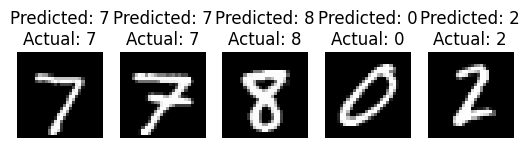

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize test images and predictions
def visualize_results(model, test_loader, num_images=5):
    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            if i >= num_images:
                break

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Convert the image tensor to a NumPy array
            image = images[0][0].squeeze().cpu().numpy()

            # Visualize the test images and their predictions
            plt.subplot(1, num_images, i + 1)
            plt.imshow(image, cmap='gray')  # Use the NumPy array for imshow
            plt.title(f'Predicted: {predicted[0]}\nActual: {labels[0]}')
            plt.axis('off')

    plt.show()

# Visualize test images and predictions
visualize_results(model, test_loader)

*   **'visualize_results'**: This function takes the trained model and a test data loader as input and visualizes a specified number of test images along with their predicted and actual labels.

#Let's Upgrade Our CNN!

There are several next steps we can take to bring our current CNN to the next level. Two of the most common next steps are updating the CNN architecture and data augmentation. We will be implementing both in the next few steps.

##Step 10: Update CNN Architecture

In [12]:
# Define the advanced CNN architecture
class AdvancedCNNClassifier(nn.Module):
    def __init__(self):
        super(AdvancedCNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the size dynamically based on the input size to the linear layer
        dummy_input = torch.randn(1, 1, 28, 28)
        self.calculate_conv_output_size(dummy_input)

        self.fc1 = nn.Linear(self.conv_output_size, 256)
        self.fc2 = nn.Linear(256, 10)

    def calculate_conv_output_size(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        self.conv_output_size = x.size(1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



We've defined a new CNN architcture named **'AdvancedCNNClassifier'** with three convolutional layers('conv1', 'conv2', 'conv3'), max-pooling layers('pool'), and wo fully connected layers ('fc1', 'fc2').


The architecture is more complex than the previous CNN, with additional convolutional and fully connected layers.


In this step we've also introduced a method 'calculate_conv_output_size' that takes. adummy input and calculates the size after the last pooling layer. This size is then used to dynamically set the input size of the first linear layer('fc1').

To provide some general foundational reasoning for updates in CNN architecture:

1. Increased Model Capacity: The original CNN architecture might not have enough capacity to capture intricate patterns in the data. By introducing more convolutional layers and parameters, the model becomes more expressive and can potentially learn more complex features.
2. Hierarchical Feature Extraction: Deepening the architecture allows the network to perform hierarchical feature extraction. Each layer can learn and represent different levels of abstraction, enabling the model to understand more intricate structures in the input data.
3. Representation Power: The deeper architecture provides the model with a higher capacity to represent both low-level and high-level features in the data. This can be particularly beneficial for image classification tasks where features are hierarchical.

##Step 11: Data Augmentaiton


In [13]:
# Define data transforms for training with data augmentation
transform_with_augmentation = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training set with data augmentation
train_dataset_with_augmentation = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform_with_augmentation,
    download=True
)

# Create a data loader for the augmented training set
train_loader_with_augmentation = torch.utils.data.DataLoader(
    dataset=train_dataset_with_augmentation,
    batch_size=64,
    shuffle=True
)


We've defined a new set of data transformation('transform_with_augmentation') for training with data augmentation.

The transformations include random rotation, random resized crop, and random horizontal flip, augmenting the training images.

We've created a new training dataste('train_dataset_with_augmentation') with the specified augmentations.

Finally, a new data loader ('train_loader_with_augmentation') is created for the augmented training dataset.

To provide some foundational reasoning for why one might want to perform data augmentation:
1. Increased Robustness: Data augmentation introduces diversity into the training set by applying random transformations to the images. This helps the model become more robust and less sensitive to variations in the input data.
2. Improved Generalization: Augmenting the training data with variations like rotation, scaling, and flipping exposes the model to a broader range of scenarios. This aids in improving the model's ability to generalize well to unseen data.
3. Mitigation of Overfitting: Data augmentation acts as a form of regularization by artificially expanding the dataset. This can be particularly helpful in mitigating overfitting, where the model memorizes the training set instead of learning generalizable patterns.
4. Realistic Input Variations: By simulating realistic variations that the model might encounter in real-world scenarios, data augmentation helps the model become more adaptive and capable of handling diverse inputs.
5. Reudced Dependency on Large Datasets: In scenarios where collecting a large labeled dataset is challenging, data augmentation provides a way to artificially increase the effective size of the training set. This is especially useful for small to moderately sized datasets.


## Step 12: Run Training Loop Again

In [14]:
# Instantiate the advanced CNN model
advanced_model = AdvancedCNNClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(advanced_model.parameters(), lr=0.001)

# Training loop with data augmentation
num_epochs = 5

for epoch in range(num_epochs):
    advanced_model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader_with_augmentation:
        optimizer.zero_grad()
        outputs = advanced_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader_with_augmentation)
    accuracy_train = correct_train / total_train

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy_train * 100:.2f}')


Epoch [1/5], Loss: 0.3466, Accuracy: 88.62
Epoch [2/5], Loss: 0.1190, Accuracy: 96.33
Epoch [3/5], Loss: 0.0868, Accuracy: 97.17
Epoch [4/5], Loss: 0.0784, Accuracy: 97.51
Epoch [5/5], Loss: 0.0703, Accuracy: 97.82


We've instantiated the advanced CNN model ('AdvancedCNNClassifier'). The loss function is defined as cross-entropy, and the optimizer is set to Adam witha learning rate of 0.001

The training loop is similar to the augmented training dataset ('train_loader_with_augmentation). The loop then prints the training loss and accuracy for each epoch.

Incorporating both an advanced architecture and data augmentation aligns with the goal of building a more powerful and robust model, capable of accurately classifying handwritten digits while being less sensitive to variations and noise in the input data.

#Conclusion

Congratulations! You've successfully built and trained a Convolutional Neural Network for classifying handwritten digits using PyTorch. In this tutorial, we covered setting up the environment, defining the CNN architecture, training the model, and evaluating its performance.

Feel free to experiment with different architectures, hyperparameters, and techniques to further improve the model's accuracy.

#Optional: Visualizing CNN Feature Maps

We can visualize CNN feature maps because each convolutional layer in the network produces a structured output: a 2D grid of numbers (like a grayscale image) that represents how strongly each filter responds to different regions of the input. These outputs, called feature maps or activation maps, are just tensors that we can extract during a forward pass. Since each map has a clear spatial layout and intensity values, we can easily convert them into images, letting us peek inside the network and see what patterns it detects as it processes the input images.

Before we can visualize what our CNN is "seeing," we need to tap into the inside of the network. We do this by setting up a hook — a tool that captures the output of a specific layer during a forward pass. Here, we'll hook into the first convolutional layer to see how it responds to input images.

In [15]:
# Create a dictionary to hold the activation
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register the hook
model.conv1.register_forward_hook(get_activation('conv1'))

Now that we can capture the activations, let's write a function to display them alongside the original image. Each feature map shows how one filter in the convolutional layer responds to different regions of the image.

In [16]:
def visualize_feature_maps(input_tensor, activation, layer_name, num_maps=6):
    feature_maps = activation[layer_name].squeeze(0)  # shape: [C, H, W]
    num_maps = min(num_maps, feature_maps.shape[0])

    # Convert input image to CPU and squeeze batch + channel dims
    input_image = input_tensor.squeeze(0).squeeze(0).cpu()

    fig, axes = plt.subplots(1, num_maps + 1, figsize=((num_maps + 1) * 2, 2))

    # Show original input image
    axes[0].imshow(input_image, cmap='gray')
    axes[0].set_title("Input Image", fontsize=8)
    axes[0].axis('off')

    # Show activation maps
    for i in range(num_maps):
        map_i = feature_maps[i].cpu()
        # Normalize for better visual contrast
        map_i = (map_i - map_i.min()) / (map_i.max() - map_i.min() + 1e-5)
        axes[i + 1].imshow(map_i, cmap='gray')
        axes[i + 1].set_title(f"Map {i}", fontsize=8)
        axes[i + 1].axis('off')

    fig.suptitle(f"Feature Maps from {layer_name}", fontsize=12)
    plt.tight_layout()
    plt.show()

Now we'll take the first few images from the test dataset, run it through the model, and visualize what the first layer of the CNN detects. White areas mean "this filter sees something important here."

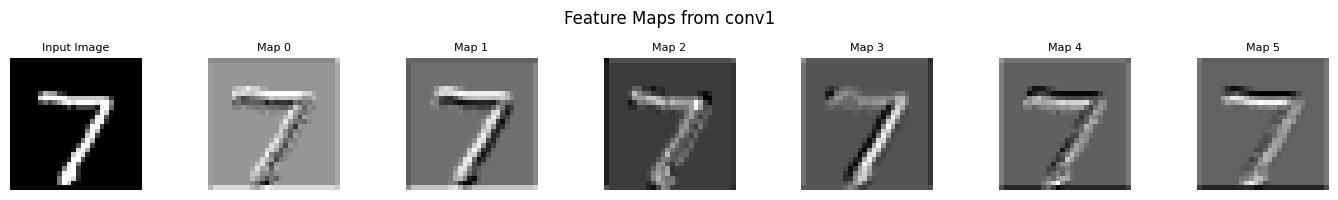

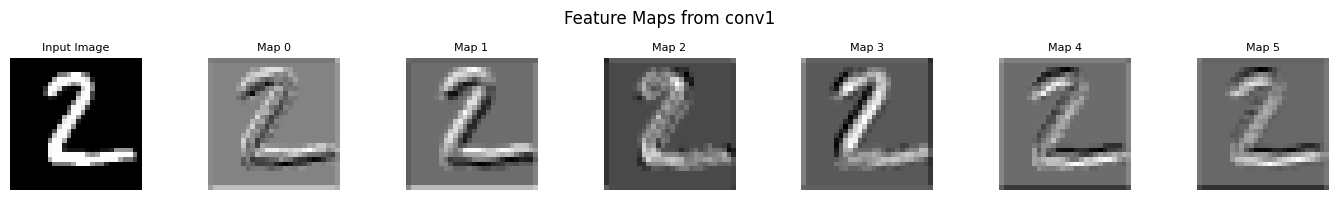

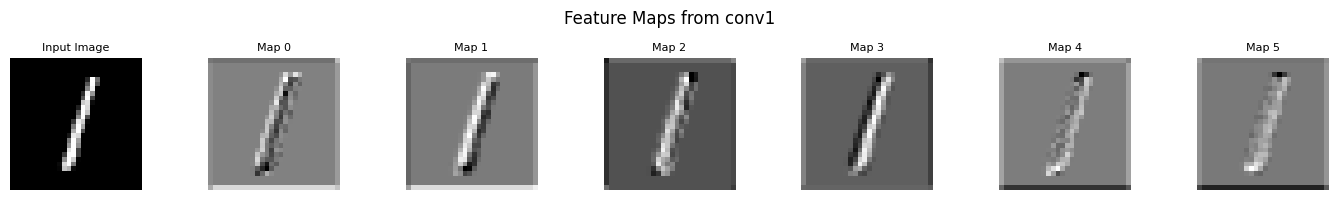

In [17]:
num_inputs = 3
num_maps = 6

for i in range(num_inputs):
    # Load one image from test set
    image, label = test_dataset[i]  # Choose index 0 or any digit
    input_tensor = image.unsqueeze(0)  # Add batch dimension: [1, 1, 28, 28]

    # Ensure model is in eval mode
    model.eval()

    # Forward pass
    with torch.no_grad():
        _ = model(input_tensor)

    # Visualize
    visualize_feature_maps(input_tensor, activation, 'conv1', num_maps)

Can you try to interpret what each feature map is looking for? How might the model then use the information it finds? Provide specific, concrete examples.